# 可视化分析

In [1]:
import os
os.getcwd()

'/home/jin/xcy/task3'

## 安装mmyolo

In [2]:
!git clone -b tutorials https://github.com/open-mmlab/mmyolo.git

Cloning into 'mmyolo'...
remote: Enumerating objects: 4898, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 4898 (delta 122), reused 234 (delta 114), pack-reused 4608
Receiving objects: 100% (4898/4898), 3.76 MiB | 2.76 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
Checking connectivity... done.


In [4]:
os.chdir('mmyolo')
!mim install -e .

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
Obtaining file:///home/jin/xcy/task3/mmyolo
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmyolo


In [5]:
import cv2

img = cv2.imread('../inference.jpg')

print(img.shape)

(675, 1200, 3)


**1. 可视化 backbone 输出的 3 个通道**

In [7]:
!python demo/featmap_vis_demo.py \
../inference.jpg \
../mmdetection/configs/rtmdet/rtmdet_balloon.py \
../mmdetection/work_dirs/rtmdet_balloon/best_coco_bbox_mAP_epoch_190.pth \
--score-thr 0.65 \
--target-layers backbone \
--channel-reduction squeeze_mean


Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_balloon/best_coco_bbox_mAP_epoch_190.pth
06/11 17:19:09 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/home/jin/anaconda3/envs/mmpose/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/jin/xcy/task3/mmdetection/mmdet/visualization/palette.py:90: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), o

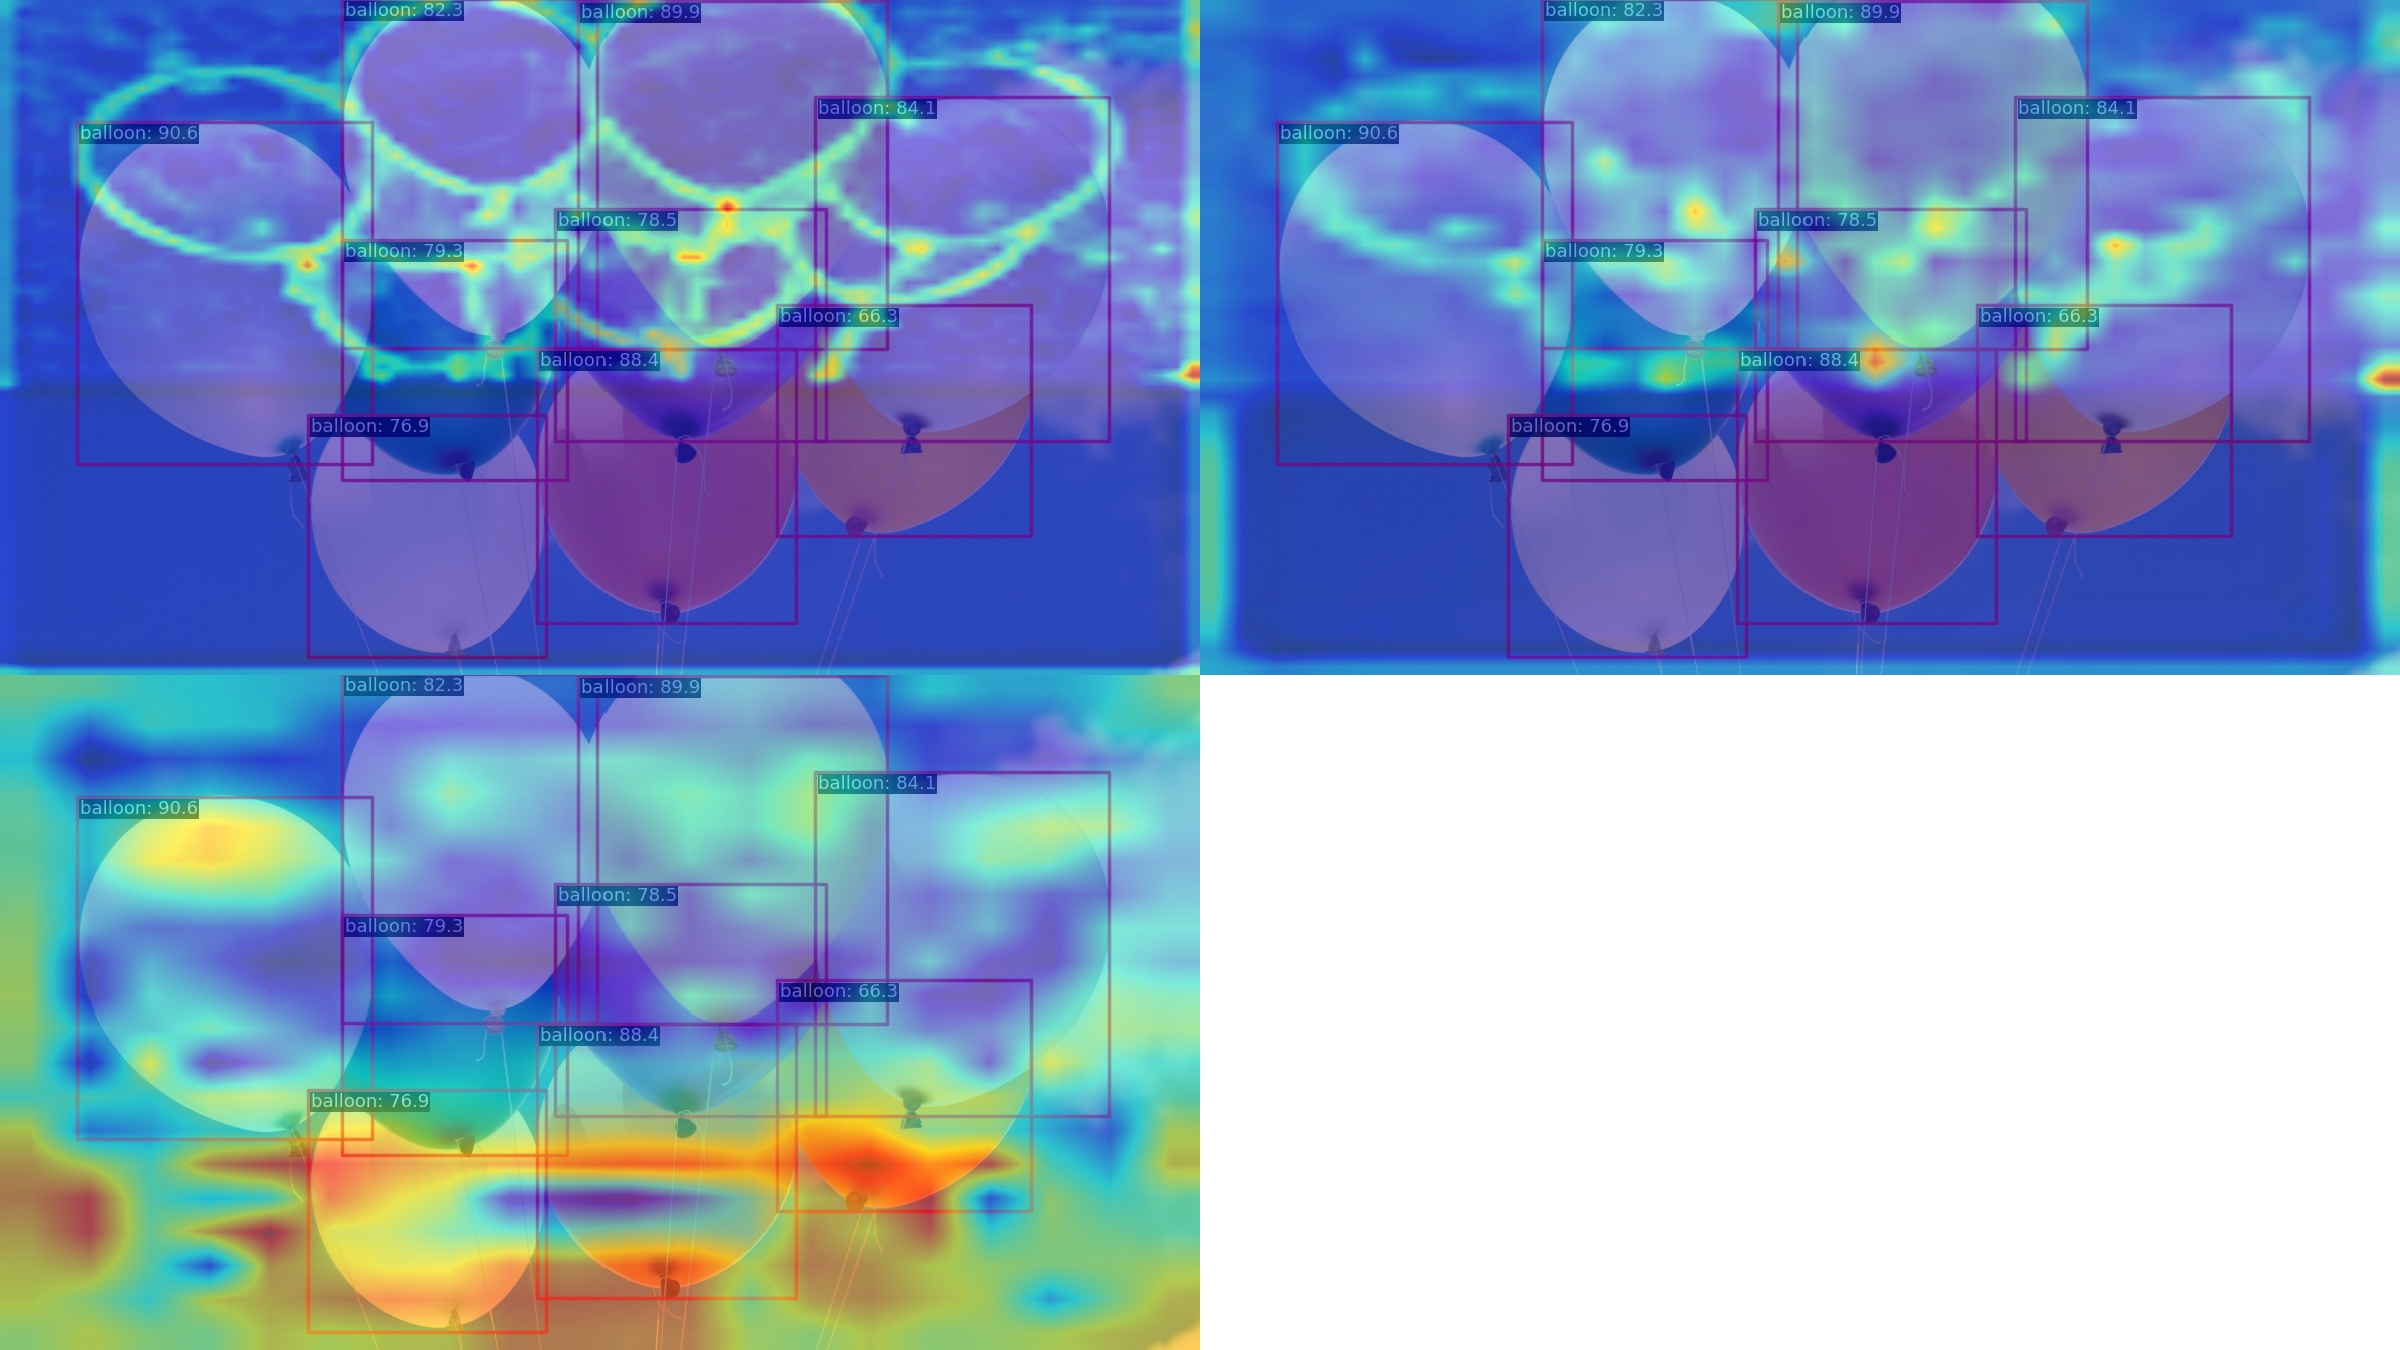

In [9]:
from PIL import Image
Image.open('/home/jin/xcy/task3/mmyolo/output/inference.jpg')     

### 2. 可视化 neck 输出的 3 个通道

In [12]:
!python demo/featmap_vis_demo.py \
../inference.jpg \
../mmdetection/configs/rtmdet/rtmdet_balloon.py \
../mmdetection/work_dirs/rtmdet_balloon/best_coco_bbox_mAP_epoch_190.pth \
--out-dir ./output/neck \
--score-thr 0.65 \
--target-layers neck \
--channel-reduction squeeze_mean


Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_balloon/best_coco_bbox_mAP_epoch_190.pth
06/11 17:29:01 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/1, elapsed: 0s, ETA:/home/jin/anaconda3/envs/mmpose/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/jin/xcy/task3/mmdetection/mmdet/visualization/palette.py:90: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), o

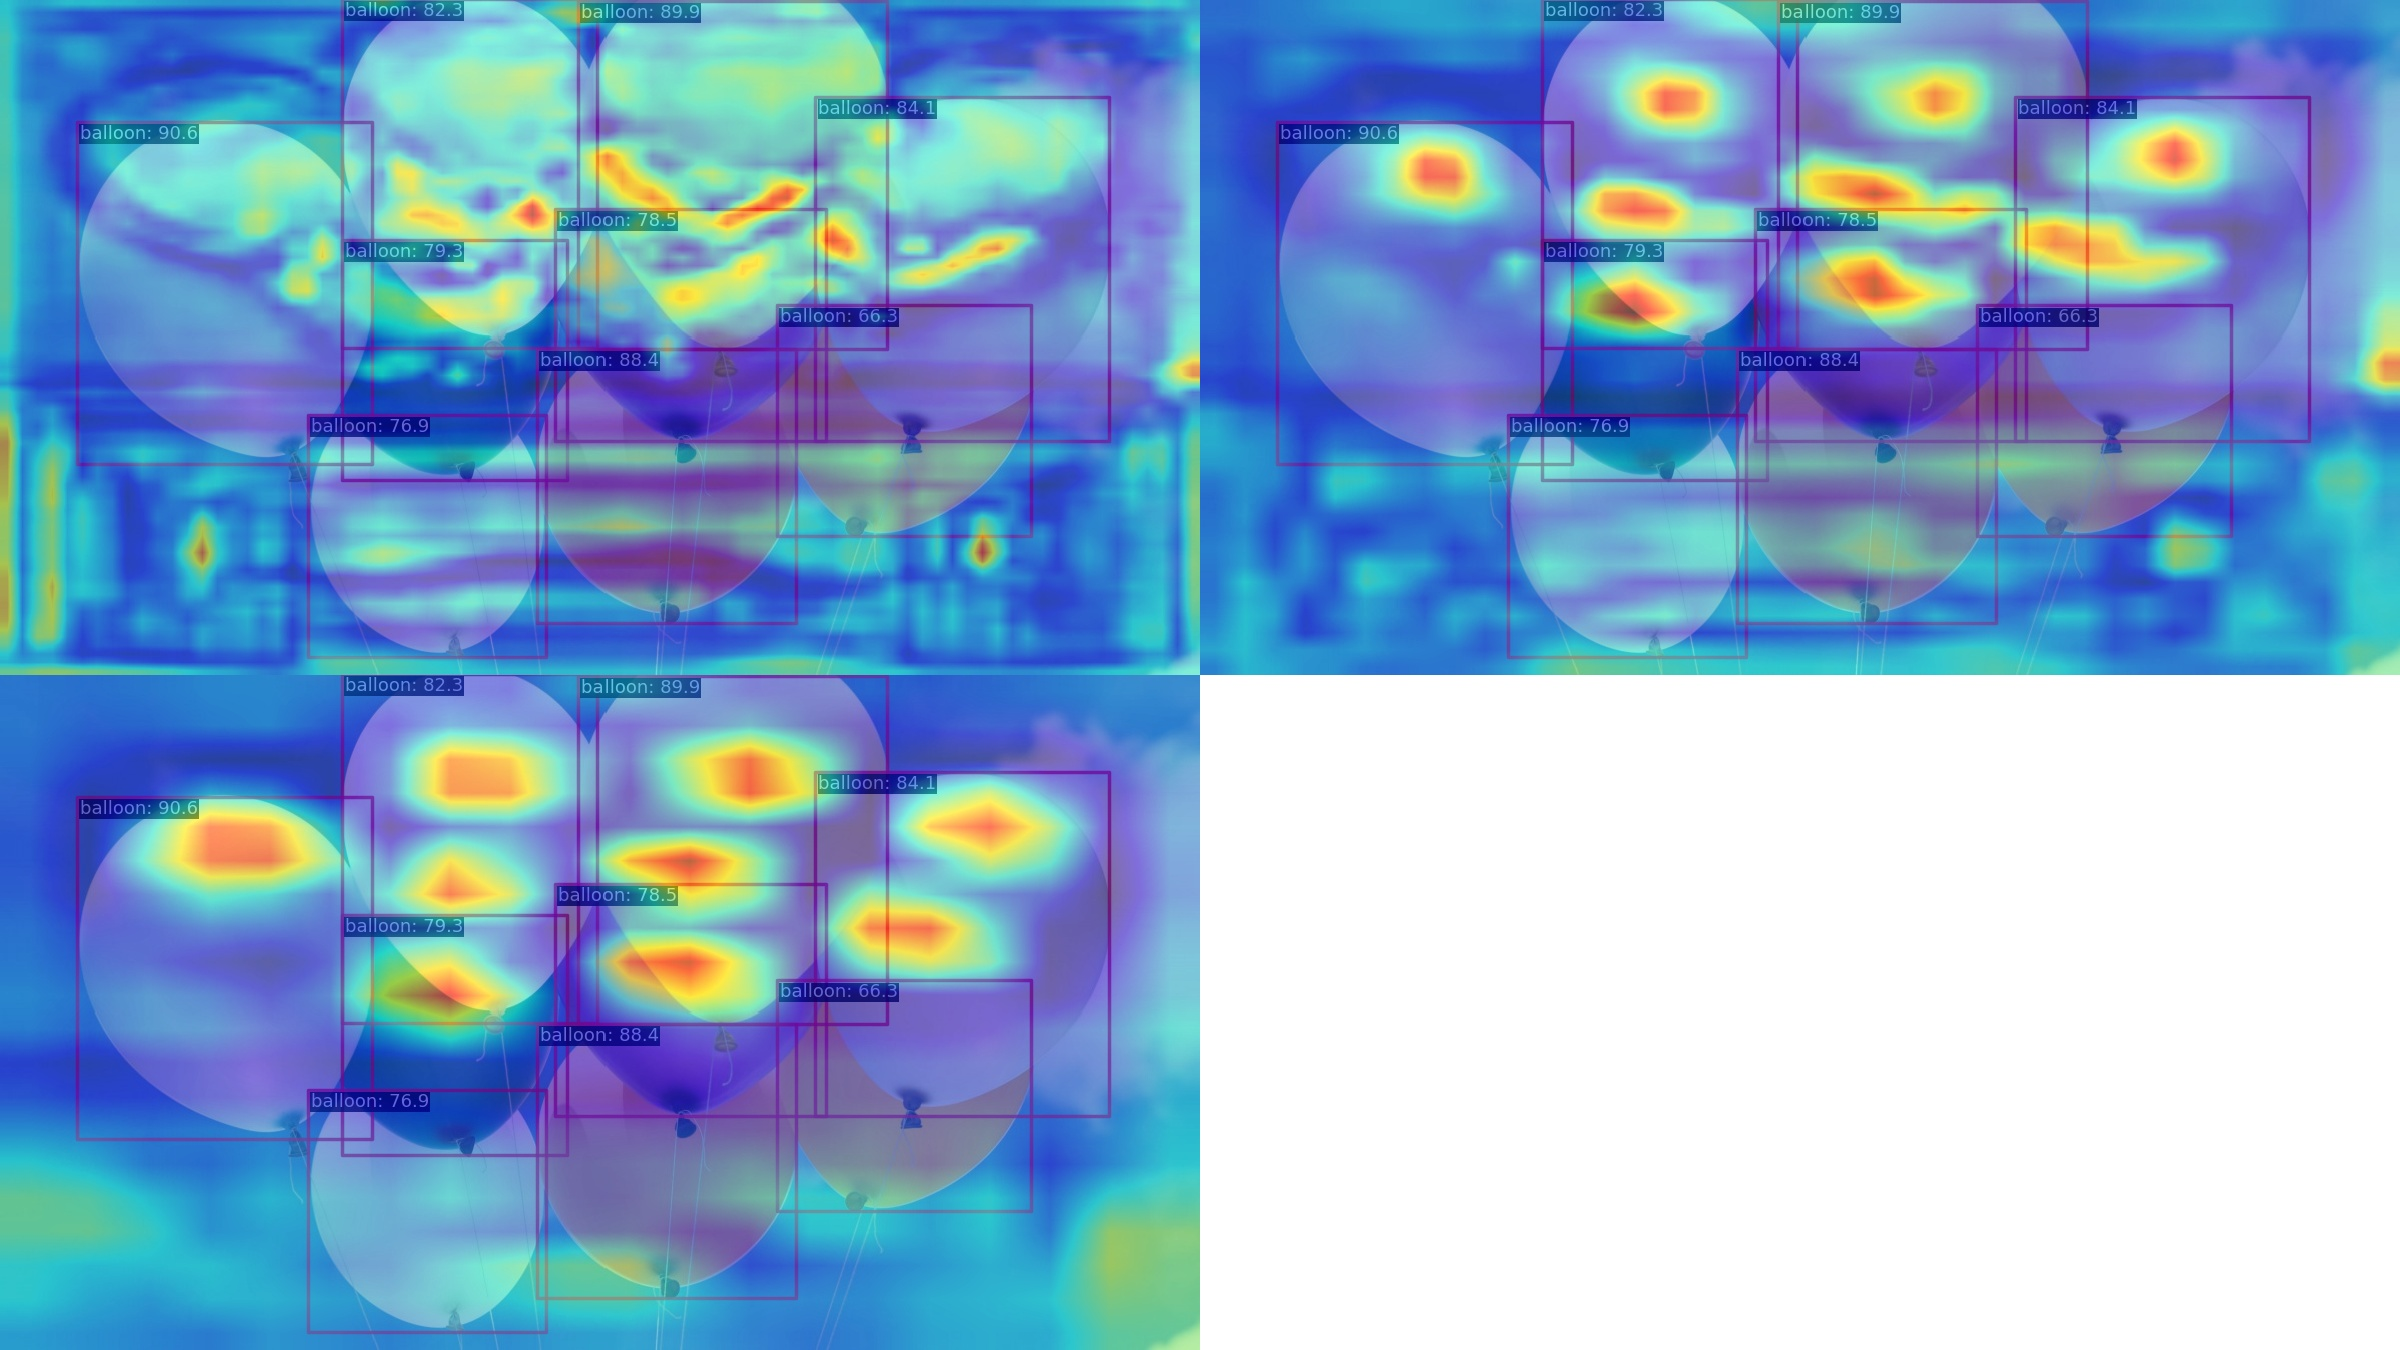

In [13]:
from PIL import Image
Image.open('/home/jin/xcy/task3/mmyolo/output/neck/inference.jpg')

## Grad-Based CAM 可视化

In [14]:
!pip install "grad-cam"

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 7.1 MB/s eta 0:00:00a 0:00:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38241 sha256=ecfc73a4afef3735cf1a335ba523f8eaa966f67d4be9b0ce8eb1cf5d363de0ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-v952lqu2/wheels/30/aa/c4/88d65c539f7e1dc61296ec47f9870081146be6bcab6698e6a5
Successfully built grad-cam


**(a) 查看 neck 输出的最小输出特征图的 Grad CAM**

In [15]:
!python demo/boxam_vis_demo.py \
../inference.jpg \
../mmdetection/configs/rtmdet/rtmdet_balloon.py \
../mmdetection/work_dirs/rtmdet_balloon/best_coco_bbox_mAP_epoch_190.pth \
--out-dir ./output/neck/out_convs_2 \
--score-thr 0.65 \
--target-layers neck.out_convs[2]

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_balloon/best_coco_bbox_mAP_epoch_190.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/home/jin/anaconda3/envs/mmpose/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/jin/anaconda3/envs/mmpose/lib/python3.7/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 0.8 task/s, e

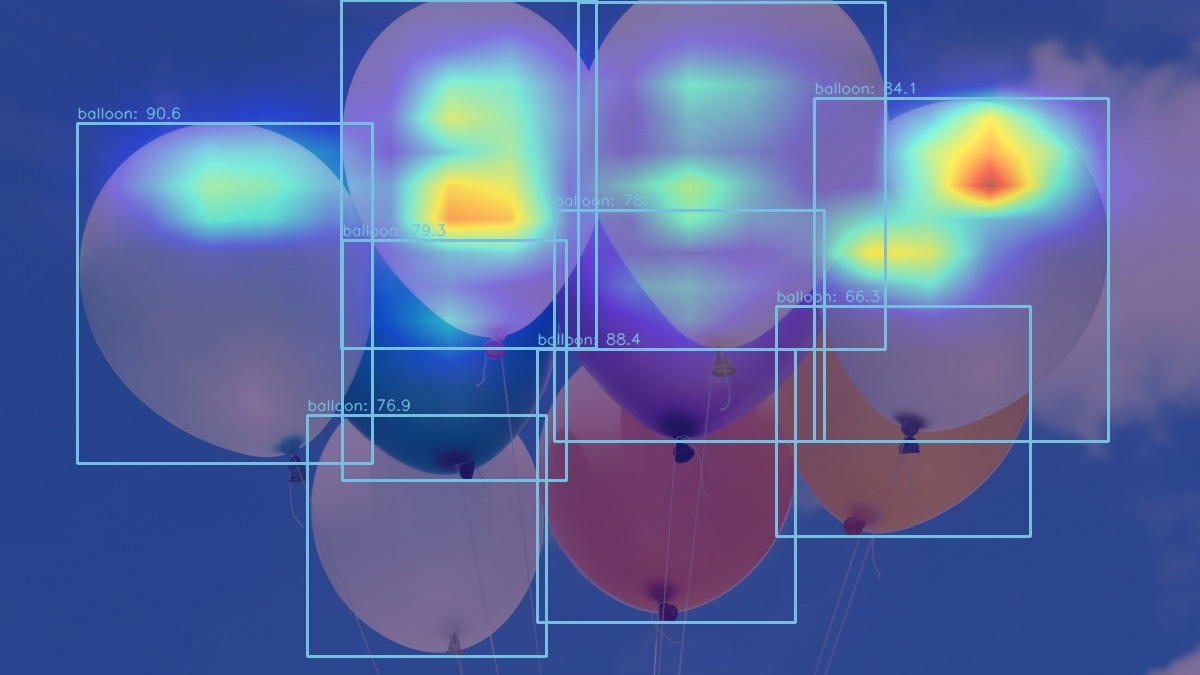

In [16]:
from PIL import Image
Image.open('/home/jin/xcy/task3/mmyolo/output/neck/out_convs_2/inference.jpg')

**(b) 查看 neck 输出的最大输出特征图的 Grad CAM**

In [17]:
!python demo/boxam_vis_demo.py \
../inference.jpg \
../mmdetection/configs/rtmdet/rtmdet_balloon.py \
../mmdetection/work_dirs/rtmdet_balloon/best_coco_bbox_mAP_epoch_190.pth \
--out-dir ./output/neck/out_convs_0 \
--score-thr 0.65 \
--target-layers neck.out_convs[0]

The algorithm currently used is rtmdet
Loads checkpoint by local backend from path: ../mmdetection/work_dirs/rtmdet_balloon/best_coco_bbox_mAP_epoch_190.pth
[                                                  ] 0/1, elapsed: 0s, ETA:/home/jin/anaconda3/envs/mmpose/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/jin/anaconda3/envs/mmpose/lib/python3.7/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 1.5 task/s, e

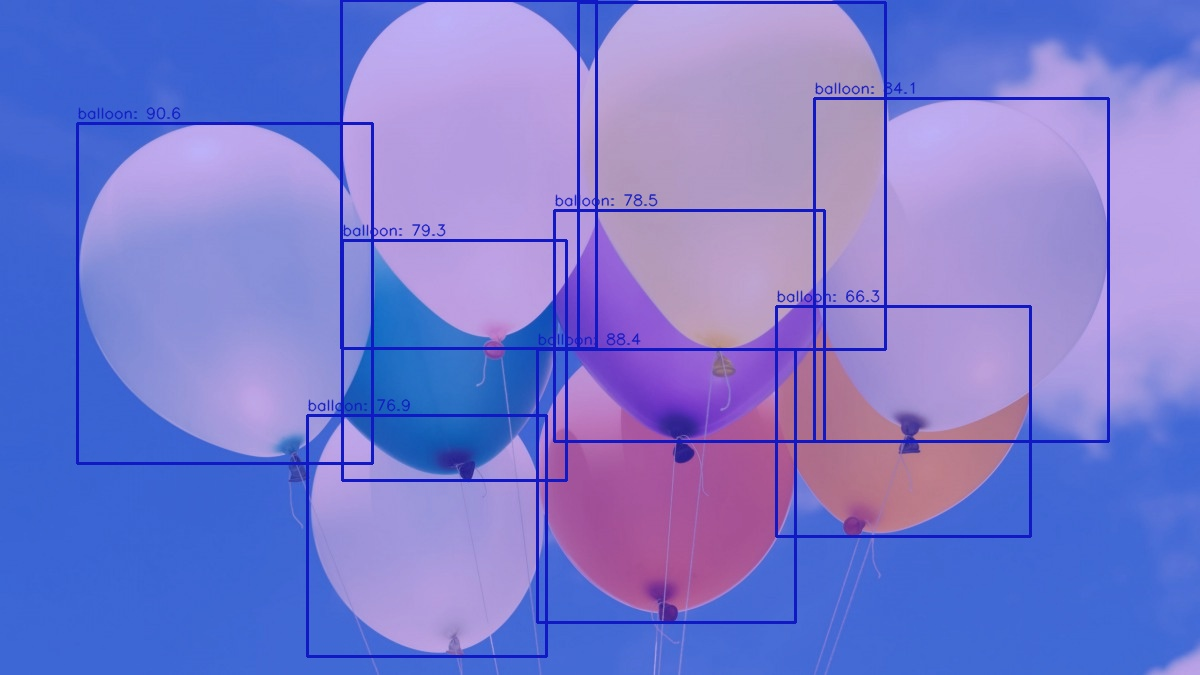

In [18]:
from PIL import Image
Image.open('/home/jin/xcy/task3/mmyolo/output/neck/out_convs_0/inference.jpg')